In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import math
import copy 
from matplotlib.gridspec import GridSpec

plt.style.use('seaborn')

In [62]:
def phase(s):
    angle=[]
    i = 0
    r = 0
    for i in range(len(s)):
        angle.append(math.atan(s.imag[i]/s.real[i]))
    return angle

## 1. Single Frequency:
### 1.1. Taking FFT for a 5Hz signal (N = 100) as the real component. 

In [63]:
N = 1000

f1 = 5
t = np.linspace(0, 1, N)
s = np.sin(f1 * 2 * np.pi * t)

fft1 = np.fft.fftshift(np.fft.fft(s))
freqs = np.linspace(-N/2, N/2 - 1, num=N)

y_max = max(np.ceil(np.abs(fft1*10)/N))
FFT_y_axis = np.linspace(-1*y_max, y_max, (2*y_max)+1)

C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


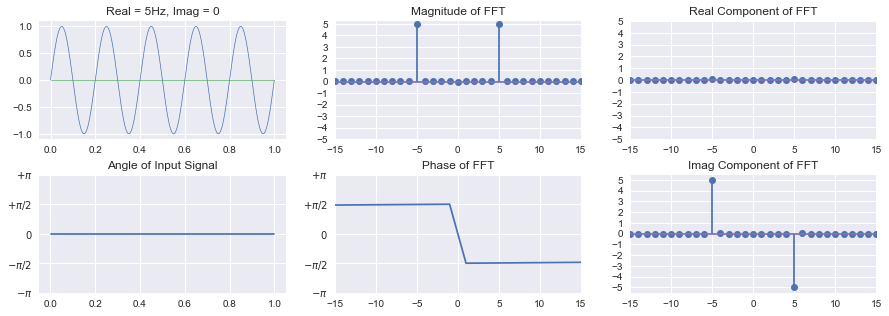

In [65]:
# Setting up the plot surface
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=2, ncols=3)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(t, s, linewidth = 0.7)
ax0.plot(t, np.zeros(N), linewidth = 0.7)
ax0.set_title('Real = '+ str(f1) + 'Hz, Imag = 0')

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(t, phase(s))
ax1.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax1.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax1.set_title('Phase of Input Signal')

ax2 = fig.add_subplot(gs[0, 1])
ax2.stem(freqs, (np.abs(fft1*10) / N), use_line_collection = True)
ax2.set_yticks(FFT_y_axis, minor=False)
ax2.set_xlim([-15, 15])
ax2.set_title('Magnitude of FFT')

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(freqs, phase(fft1))
ax3.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax3.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax3.set_xlim([-15, 15])
ax3.set_title('Phase of FFT')

ax4 = fig.add_subplot(gs[0, 2])
ax4.stem(freqs, (fft1.real*10 / N), use_line_collection = True)
ax4.set_yticks(FFT_y_axis, minor=False)
ax4.set_xlim([-15, 15])
ax4.set_title('Real Component of FFT')

ax5 = fig.add_subplot(gs[1, 2])
ax5.stem(freqs, (fft1.imag*10 / N), use_line_collection = True)
ax5.set_yticks(FFT_y_axis, minor=False)
ax5.set_xlim([-15, 15])
ax5.set_title('Imag Component of FFT')

plt.show()

### 1.2. Taking FFT for a 5Hz signal (N = 100) as the imaginary component. 

In [66]:
s_i = [complex(a,b) for a,b in zip(np.zeros(N) ,s)]
fft2 = np.fft.fftshift(np.fft.fft(s_i))

y_max = max(np.ceil(np.abs(fft2*10)/N))
FFT_y_axis = np.linspace(-1*y_max, y_max, (2*y_max)+1)

C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  """


C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


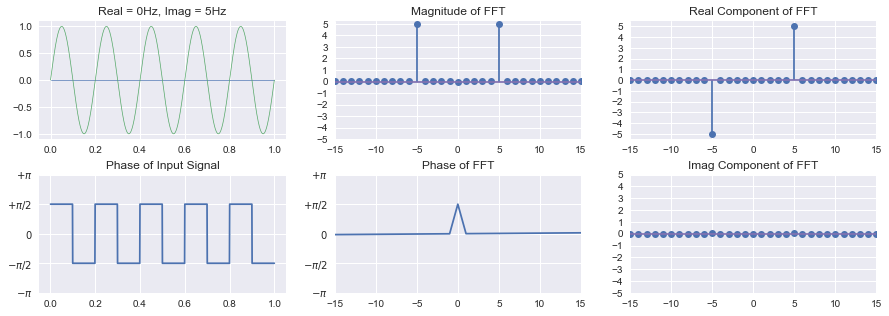

In [67]:
# Setting up the plot surface
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=2, ncols=3)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(t, np.zeros(N), linewidth = 0.7)
ax0.plot(t, s, linewidth = 0.7)
ax0.set_title('Real = 0Hz, Imag = '+ str(f1) + 'Hz')

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(t, phase(np.array(s_i)))
ax1.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax1.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax1.set_title('Phase of Input Signal')

ax2 = fig.add_subplot(gs[0, 1])
ax2.stem(freqs, (np.abs(fft2*10) / N), use_line_collection = True)
ax2.set_yticks(FFT_y_axis, minor=False)
ax2.set_xlim([-15, 15])
ax2.set_title('Magnitude of FFT')

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(freqs, phase(fft2))
ax3.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax3.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax3.set_xlim([-15, 15])
ax3.set_title('Phase of FFT')

ax4 = fig.add_subplot(gs[0, 2])
ax4.stem(freqs, (fft2.real*10 / N), use_line_collection = True)
ax4.set_yticks(FFT_y_axis, minor=False)
ax4.set_xlim([-15, 15])
ax4.set_title('Real Component of FFT')

ax5 = fig.add_subplot(gs[1, 2])
ax5.stem(freqs, (fft2.imag*10 / N), use_line_collection = True)
ax5.set_yticks(FFT_y_axis, minor=False)
ax5.set_xlim([-15, 15])
ax5.set_title('Imag Component of FFT')

plt.show()

### Conclusion: 
1. Real component is mostly positive, Imag is both positive and negative 
2. Imag component is mostly positive, Real is both positive and negative 

When the real component and the imaginary component of the input signal are interchanged: The real component and the imaginary component also interchange in the frequency spectrum 

## 2. Multiple Frequency:
### 2.1. Taking FFT for a 5Hz signal (N = 100) as the real component and 10Hz as the imaginary component. 

In [68]:
N = 1000

f1 = 5
f2 = 10

t = np.linspace(0, 1, N)
s1 = np.sin(f1 * 2 * np.pi * t) 
c1 = np.sin(f2 * 2 * np.pi * t) 
com_1 = [complex(a,b) for a,b in zip(s1 ,c1)]

fft3 = np.fft.fftshift(np.fft.fft(com_1))
freqs = np.linspace(-N/2, N/2 - 1, num=N)

y_max = max(np.ceil(np.abs(fft3*10)/N))
FFT_y_axis = np.linspace(-1*y_max, y_max, (2*y_max)+1)

C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


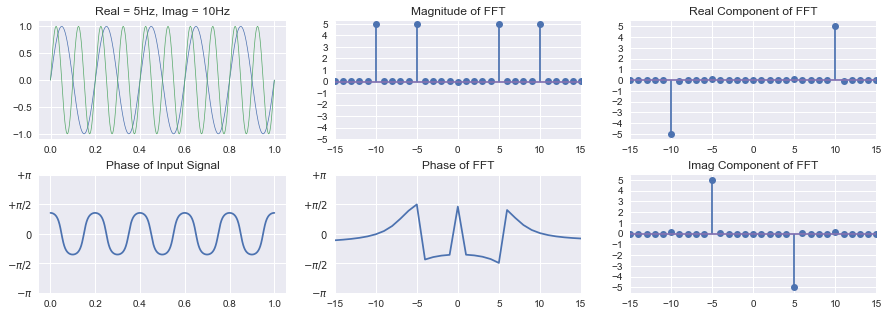

In [69]:
# Setting up the plot surface
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=2, ncols=3)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(t, s1, linewidth = 0.7)
ax0.plot(t, c1, linewidth = 0.7)
ax0.set_title('Real = '+ str(f1) + 'Hz, Imag = '+ str(f2) + 'Hz')

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(t, phase(np.array(com_1)))
ax1.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax1.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax1.set_title('Phase of Input Signal')

ax2 = fig.add_subplot(gs[0, 1])
ax2.stem(freqs, (np.abs(fft3*10) / N), use_line_collection = True)
ax2.set_yticks(FFT_y_axis, minor=False)
ax2.set_xlim([-15, 15])
ax2.set_title('Magnitude of FFT')

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(freqs, phase(fft3))
ax3.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax3.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax3.set_xlim([-15, 15])
ax3.set_title('Phase of FFT')

ax4 = fig.add_subplot(gs[0, 2])
ax4.stem(freqs, (fft3.real*10 / N), use_line_collection = True)
ax4.set_yticks(FFT_y_axis, minor=False)
ax4.set_xlim([-15, 15])
ax4.set_title('Real Component of FFT')

ax5 = fig.add_subplot(gs[1, 2])
ax5.stem(freqs, (fft3.imag*10 / N), use_line_collection = True)
ax5.set_yticks(FFT_y_axis, minor=False)
ax5.set_xlim([-15, 15])
ax5.set_title('Imag Component of FFT')

plt.show()

### 2.2. Taking FFT for a 5Hz signal (N = 100) as the imaginary component and 10Hz as the real component. 

In [70]:
f1 = 10
f2 = 5

t = np.linspace(0, 1, N)
s2 = np.sin(f1 * 2 * np.pi * t) 
c2 = np.sin(f2 * 2 * np.pi * t) 
com_2 = [complex(a,b) for a,b in zip(s2 ,c2)]

fft4 = np.fft.fftshift(np.fft.fft(com_2))

y_max = max(np.ceil(np.abs(fft4*10)/N))
FFT_y_axis = np.linspace(-1*y_max, y_max, (2*y_max)+1)

C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


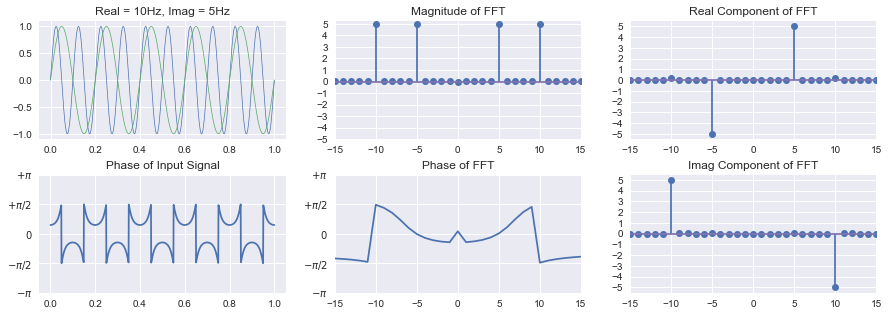

In [71]:
# Setting up the plot surface
fig = plt.figure(figsize=(15, 5))
gs = GridSpec(nrows=2, ncols=3)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(t, s2, linewidth = 0.7)
ax0.plot(t, c2, linewidth = 0.7)
ax0.set_title('Real = '+ str(f1) + 'Hz, Imag = '+ str(f2) + 'Hz')

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(t, phase(np.array(com_2)))
ax1.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax1.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax1.set_title('Phase of Input Signal')

ax2 = fig.add_subplot(gs[0, 1])
ax2.stem(freqs, (np.abs(fft4*10) / N), use_line_collection = True)
ax2.set_yticks(FFT_y_axis, minor=False)
ax2.set_xlim([-15, 15])
ax2.set_title('Magnitude of FFT')

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(freqs, phase(fft4))
ax3.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax3.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax3.set_xlim([-15, 15])
ax3.set_title('Phase of FFT')

ax4 = fig.add_subplot(gs[0, 2])
ax4.stem(freqs, (fft4.real*10 / N), use_line_collection = True)
ax4.set_yticks(FFT_y_axis, minor=False)
ax4.set_xlim([-15, 15])
ax4.set_title('Real Component of FFT')

ax5 = fig.add_subplot(gs[1, 2])
ax5.stem(freqs, (fft4.imag*10 / N), use_line_collection = True)
ax5.set_yticks(FFT_y_axis, minor=False)
ax5.set_xlim([-15, 15])
ax5.set_title('Imag Component of FFT')

plt.show()

### Conclusion: 
1. Real component is mostly positive, Imag is both positive and negative 
2. Imag component is mostly positive, Real is both positive and negative 

When the real component and the imaginary component of the input signal are interchanged: The real component and the imaginary component also interchange in the frequency spectrum 

## 3. Effects of changes in Time Domain:
### 3.1. Shifting:

In [72]:
N = 1000
f = 10

t = np.linspace(0, 1, N)
t_ = np.linspace(0, 2, 2*N)

s = np.sin(f * 2 * np.pi * t) 
s_ = np.sin(f* 2 * np.pi * t_)

fft = np.fft.fftshift(np.fft.fft(s))

shft_f = 50

s_11 = s_[shft_f: shft_f+N]

fft5 = np.fft.fftshift(np.fft.fft(s_11))
freqs = np.linspace(-N/2, N/2 - 1, num=N)

y_max = max([max(np.ceil(np.abs(fft5*10)/N)), max(np.ceil(np.abs(fft*10)/N))])
FFT_y_axis = np.linspace(-1*y_max, y_max, (2*y_max)+1)

C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


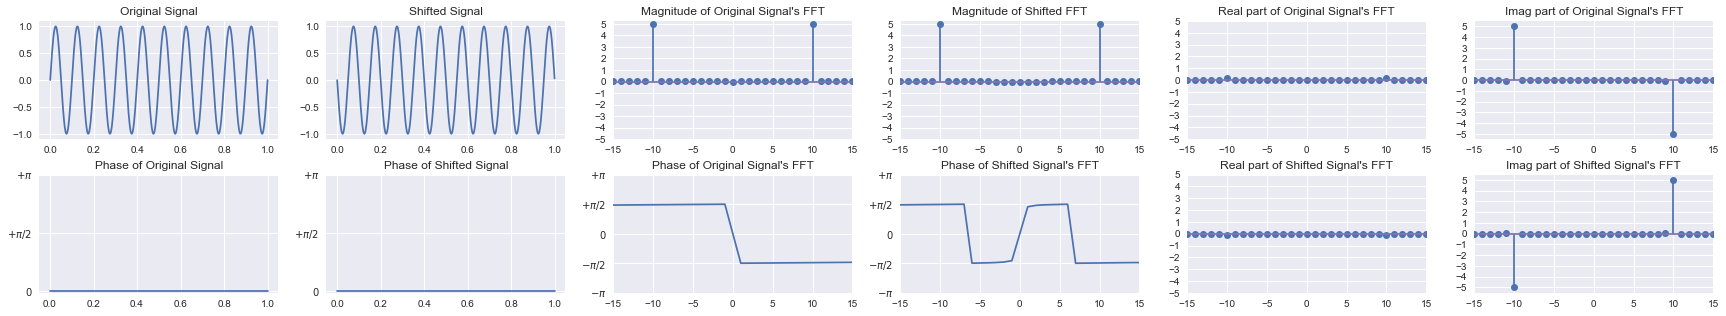

In [73]:
# Setting up the plot surface
fig = plt.figure(figsize=(30, 5))
gs = GridSpec(nrows=2, ncols=6)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(t, s)
ax0.set_title('Original Signal')

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(t, phase(s))
ax1.set_yticks([0, np.pi/2, np.pi], minor=False)
ax1.set_yticklabels([r'$0$', r'$+\pi/2$', r'$+\pi$'],  fontdict=None, minor=False)
ax1.set_title('Phase of Original Signal')

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(t, s_11)
ax2.set_title('Shifted Signal')

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(t, phase(np.array(s_11)))
ax3.set_yticks([0, np.pi/2, np.pi], minor=False)
ax3.set_yticklabels([r'$0$', r'$+\pi/2$', r'$+\pi$'],  fontdict=None, minor=False)
ax3.set_title('Phase of Shifted Signal')

ax4 = fig.add_subplot(gs[0, 2])
ax4.stem(freqs, np.abs(fft)*10 / N, use_line_collection = True)
ax4.set_yticks(FFT_y_axis, minor=False)
ax4.set_xlim([-15, 15])
ax4.set_title('Magnitude of Original Signal\'s FFT')

ax5 = fig.add_subplot(gs[1, 2])
ax5.plot(freqs, phase(fft))
ax5.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax5.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax5.set_xlim([-15, 15])
ax5.set_title('Phase of Original Signal\'s FFT')

ax6 = fig.add_subplot(gs[0, 3])
ax6.stem(freqs, np.abs(fft5)*10 / N, use_line_collection = True)
ax6.set_yticks(FFT_y_axis, minor=False)
ax6.set_xlim([-15, 15])
ax6.set_title('Magnitude of Shifted FFT')

ax7 = fig.add_subplot(gs[1, 3])
ax7.plot(freqs, phase(fft5))
ax7.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax7.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax7.set_xlim([-15, 15])
ax7.set_title('Phase of Shifted Signal\'s FFT')

ax8 = fig.add_subplot(gs[0, 4])
ax8.stem(freqs, fft.real*10 / N, use_line_collection = True)
ax8.set_yticks(FFT_y_axis, minor=False)
ax8.set_xlim([-15, 15])
ax8.set_title('Real part of Original Signal\'s FFT')

ax9 = fig.add_subplot(gs[1, 4])
ax9.stem(freqs, fft5.real*10 / N, use_line_collection = True)
ax9.set_yticks(FFT_y_axis, minor=False)
ax9.set_xlim([-15, 15])
ax9.set_title('Real part of Shifted Signal\'s FFT')

ax10 = fig.add_subplot(gs[0, 5])
ax10.stem(freqs, fft.imag*10 / N, use_line_collection = True)
ax10.set_yticks(FFT_y_axis, minor=False)
ax10.set_xlim([-15, 15])
ax10.set_title('Imag part of Original Signal\'s FFT')

ax11 = fig.add_subplot(gs[1, 5])
ax11.stem(freqs, fft5.imag*10 / N, use_line_collection = True)
ax11.set_yticks(FFT_y_axis, minor=False)
ax11.set_xlim([-15, 15])
ax11.set_title('Imag part of Shifted Signal\'s FFT')

plt.show()

### 3.2. Scaling: 

In [44]:
def rescale(arr, factor=2):
    n = len(arr)
    return np.interp(np.linspace(0, n, factor*n+1), np.arange(n), arr)

In [75]:
N = 1000
f = 10

t = np.linspace(0, 1, N)
s = np.sin(f * 2 * np.pi * t) 

scaling_f = 2
s_12 = rescale(s, scaling_f).tolist()  
fac = min(len(s), len(s_12))
fft = np.fft.fftshift(np.fft.fft(s)[0:fac])
fft6 = np.fft.fftshift(np.fft.fft(s_12[0:fac]))

t_ = np.linspace(0, (scaling_f*N+1)/N, scaling_f*N+1)
t__ = np.linspace(0, scaling_f, scaling_f+1)

freqs = np.linspace(-N/2, N/2 - 1, num=N)
freqs_ = np.linspace(-(scaling_f*N)/2, (scaling_f*N)/2, num=scaling_f*N+1)
freqs__ = np.linspace(-(scaling_f*N)/2, (scaling_f*N)/2, num=((scaling_f*N)/100)+1) 

y_max = max([max(np.ceil(np.abs(fft6*10)/N)), max(np.ceil(np.abs(fft*10)/N))]) + 1
FFT_y_axis = np.linspace(-1*y_max, y_max, (2*y_max)+1)
FFT_y_axis_l = np.linspace(-1*y_max, y_max, (2*y_max)/5+1)


C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


C:\Users\samik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


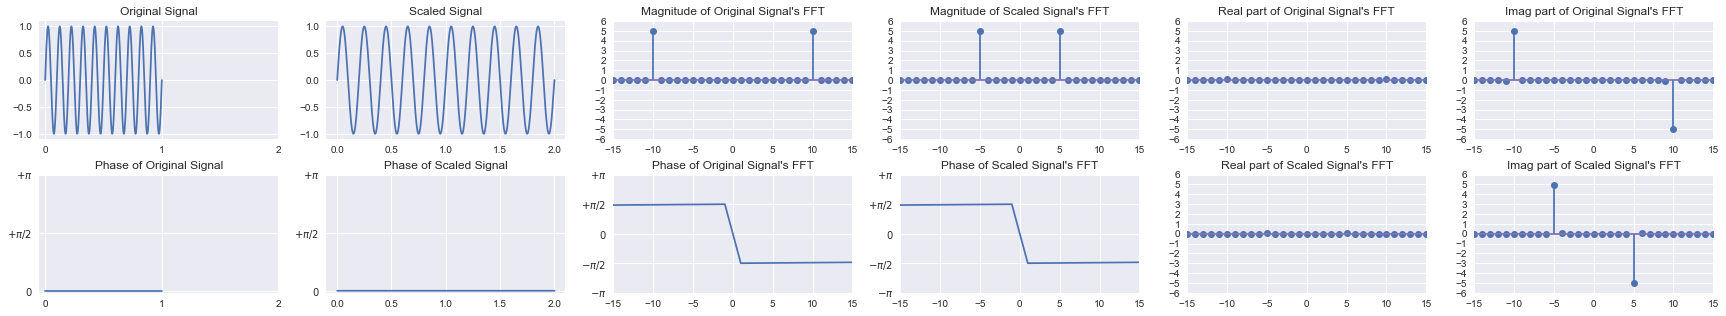

In [76]:
# Setting up the plot surface
fig = plt.figure(figsize=(30, 5))
gs = GridSpec(nrows=2, ncols=6)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(t, s)
ax0.set_xticks(t__, minor=False)
ax0.set_title('Original Signal')

ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(t, phase(s))
ax1.set_yticks([0, np.pi/2, np.pi], minor=False)
ax1.set_xticks(t__, minor=False)
ax1.set_yticklabels([r'$0$', r'$+\pi/2$', r'$+\pi$'],  fontdict=None, minor=False)
ax1.set_title('Phase of Original Signal')

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(t_, s_12)
ax2.set_title('Scaled Signal')

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(t_, phase(np.array(s_12)))
ax3.set_yticks([0, np.pi/2, np.pi], minor=False)
ax3.set_yticklabels([r'$0$', r'$+\pi/2$', r'$+\pi$'],  fontdict=None, minor=False)
ax3.set_title('Phase of Scaled Signal')

ax4 = fig.add_subplot(gs[0, 2])
ax4.stem(freqs, np.abs(fft)*10 / N, use_line_collection = True)
ax4.set_yticks(FFT_y_axis, minor=False)
ax4.set_xlim([-15, 15])
ax4.set_title('Magnitude of Original Signal\'s FFT')

ax5 = fig.add_subplot(gs[1, 2])
ax5.plot(freqs, phase(fft))
ax5.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax5.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax5.set_xlim([-15, 15])
ax5.set_title('Phase of Original Signal\'s FFT')

ax6 = fig.add_subplot(gs[0, 3])
ax6.stem(freqs, np.abs(fft6)*10 / N, use_line_collection = True)
ax6.set_yticks(FFT_y_axis, minor=False)
ax6.set_xlim([-15, 15])
ax6.set_title('Magnitude of Scaled Signal\'s FFT')

ax7 = fig.add_subplot(gs[1, 3])
ax7.plot(freqs, phase(fft6))
ax7.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax7.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax7.set_xlim([-15, 15])
ax7.set_title('Phase of Scaled Signal\'s FFT')

ax8 = fig.add_subplot(gs[0, 4])
ax8.stem(freqs, fft.real*10 / N, use_line_collection = True)
ax8.set_yticks(FFT_y_axis, minor=False)
ax8.set_xlim([-15, 15])
ax8.set_title('Real part of Original Signal\'s FFT')

ax9 = fig.add_subplot(gs[1, 4])
ax9.stem(freqs, fft6.real*10 / N, use_line_collection = True)
ax9.set_yticks(FFT_y_axis, minor=False)
ax9.set_xlim([-15, 15])
ax9.set_title('Real part of Scaled Signal\'s FFT')

ax10 = fig.add_subplot(gs[0, 5])
ax10.stem(freqs, fft.imag*10 / N, use_line_collection = True)
ax10.set_yticks(FFT_y_axis, minor=False)
ax10.set_xlim([-15, 15])
ax10.set_title('Imag part of Original Signal\'s FFT')

ax11 = fig.add_subplot(gs[1, 5])
ax11.stem(freqs, fft6.imag*10 / N, use_line_collection = True)
ax11.set_yticks(FFT_y_axis, minor=False)
ax11.set_xlim([-15, 15])
ax11.set_title('Imag part of Scaled Signal\'s FFT')

plt.show()

## 4. Effect of changes in Frequency domain:
### 4.1. Shifting:

In [15]:
N = 100
f = 10

fft = np.zeros(N).tolist()
fft[f] = 1
fft[-1*f] = 1

shft_f = 10
fft1 = np.zeros(N).tolist()
fft1[f+shft_f] = 1
fft1[-1*(f+shft_f)] = 1

s = np.fft.ifft(fft)
s1 = np.fft.ifft(fft1)

freqs = np.linspace(-N/2, N/2 - 1, num=N)
t = np.linspace(0, 1, N)


C:\Users\samik\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


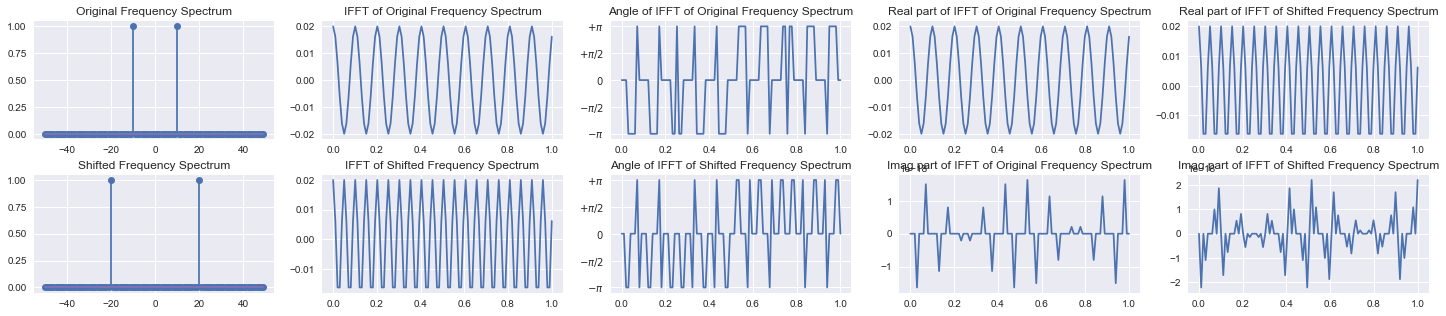

In [16]:
# Setting up the plot surface
fig = plt.figure(figsize=(25, 5))
gs = GridSpec(nrows=2, ncols=5)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.stem(freqs, np.fft.fftshift(fft), use_line_collection = True)
ax0.set_title('Original Frequency Spectrum')

ax1 = fig.add_subplot(gs[1, 0])
ax1.stem(freqs, np.fft.fftshift(fft1), use_line_collection = True)
ax1.set_title('Shifted Frequency Spectrum')

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(t, s)
ax2.set_title('IFFT of Original Frequency Spectrum')

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(t, s1)
ax3.set_title('IFFT of Shifted Frequency Spectrum')

ax4 = fig.add_subplot(gs[0, 2])
ax4.plot(t, np.angle(s))
ax4.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax4.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax4.set_title('Angle of IFFT of Original Frequency Spectrum')

ax5 = fig.add_subplot(gs[1, 2])
ax5.plot(t, np.angle(s1))
ax5.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax5.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax5.set_title('Angle of IFFT of Shifted Frequency Spectrum')

ax6 = fig.add_subplot(gs[0, 3])
ax6.plot(t, s.real)
ax6.set_title('Real part of IFFT of Original Frequency Spectrum')

ax7 = fig.add_subplot(gs[1, 3])
ax7.plot(t, s.imag)
ax7.set_title('Imag part of IFFT of Original Frequency Spectrum')

ax8 = fig.add_subplot(gs[0, 4])
ax8.plot(t, s1.real)
ax8.set_title('Real part of IFFT of Shifted Frequency Spectrum')

ax9 = fig.add_subplot(gs[1, 4])
ax9.plot(t, s1.imag)
ax9.set_title('Imag part of IFFT of Shifted Frequency Spectrum')

plt.show()

### 4.2. Scaling:

In [17]:
N = 100
f = 10

fft = np.zeros(N).tolist()
fft[f] = 1
fft[-1*f] = 1

scaling_f = 2
fft1 = np.zeros(N*scaling_f).tolist()
fft1[f*scaling_f] = 1
fft1[-1*(f*scaling_f)] = 1

s = np.fft.ifft(fft)
s1 = np.fft.ifft(fft1)

freqs = np.linspace(-N/2, N/2 - 1, num=N)
freqs_ = np.linspace(-(scaling_f*N)/2, (scaling_f*N)/2 - 1, num=scaling_f*N)

t = np.linspace(0, 1, N)
t_ = np.linspace(0, scaling_f, N*scaling_f)
t_1 = np.linspace(0, scaling_f, scaling_f+1)

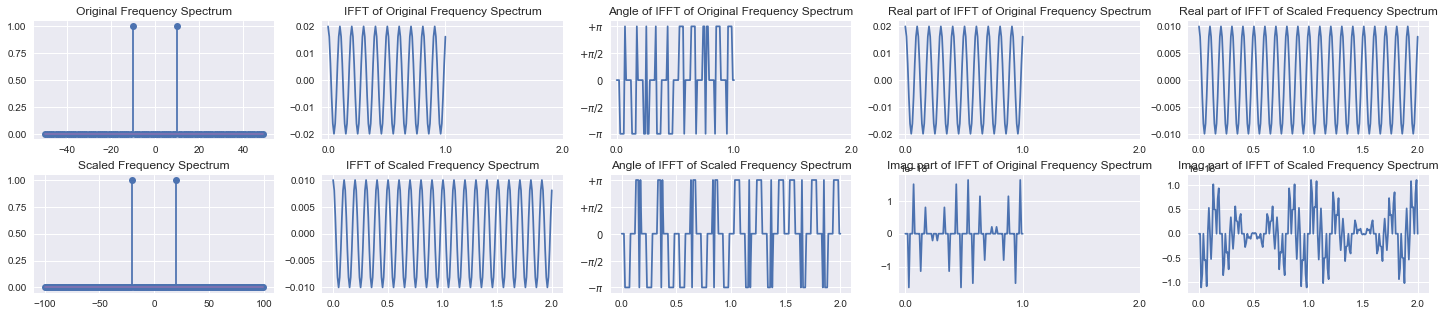

In [18]:
# Setting up the plot surface
fig = plt.figure(figsize=(25, 5))
gs = GridSpec(nrows=2, ncols=5)
gs.update(wspace = 0.2, hspace = 0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax0.stem(freqs, np.fft.fftshift(fft), use_line_collection = True)
ax0.set_title('Original Frequency Spectrum')

ax1 = fig.add_subplot(gs[1, 0])
ax1.stem(freqs_, np.fft.fftshift(fft1), use_line_collection = True)
ax1.set_title('Scaled Frequency Spectrum')

ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(t, s)
ax2.set_xticks(t_1, minor=False)
ax2.set_xticklabels(t_1, fontdict=None, minor=False)
ax2.set_title('IFFT of Original Frequency Spectrum')

ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(t_, s1)
ax3.set_title('IFFT of Scaled Frequency Spectrum')

ax4 = fig.add_subplot(gs[0, 2])
ax4.plot(t, np.angle(s))
ax4.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax4.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax4.set_xticks(t_1, minor=False)
ax4.set_xticklabels(t_1, fontdict=None, minor=False)
ax4.set_title('Angle of IFFT of Original Frequency Spectrum')

ax5 = fig.add_subplot(gs[1, 2])
ax5.plot(t_, np.angle(s1))
ax5.set_yticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi], minor=False)
ax5.set_yticklabels([r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontdict=None, minor=False)
ax5.set_title('Angle of IFFT of Scaled Frequency Spectrum')

ax6 = fig.add_subplot(gs[0, 3])
ax6.plot(t, s.real)
ax6.set_title('Real part of IFFT of Original Frequency Spectrum')
ax6.set_xticks(t_1, minor=False)
ax6.set_xticklabels(t_1, fontdict=None, minor=False)

ax7 = fig.add_subplot(gs[1, 3])
ax7.plot(t, s.imag)
ax7.set_title('Imag part of IFFT of Original Frequency Spectrum')
ax7.set_xticks(t_1, minor=False)
ax7.set_xticklabels(t_1, fontdict=None, minor=False)

ax8 = fig.add_subplot(gs[0, 4])
ax8.plot(t_, s1.real)
ax8.set_title('Real part of IFFT of Scaled Frequency Spectrum')

ax9 = fig.add_subplot(gs[1, 4])
ax9.plot(t_, s1.imag)
ax9.set_title('Imag part of IFFT of Scaled Frequency Spectrum')

plt.show()